In [236]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data. Predictive data analytics methods are easy to apply with this dataset.

- Attribute information

- Invoice id: Computer generated sales slip invoice identification number

- Branch: Branch of supercenter (3 branches are available identified by A, B and C).

- City: Location of supercenters

- Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.

- Gender: Gender type of customer

- Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

- Unit price: Price of each product in $

- Quantity: Number of products purchased by customer

- Tax: 5% tax fee for customer buying

- Total: Total price including tax

- Date: Date of purchase (Record available from January 2019 to March 2019)

- Time: Purchase time (10am to 9pm)

- Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

- COGS: Cost of goods sold

- Gross margin percentage: Gross margin percentage

- Gross income: Gross income

- Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

In [37]:
df=pd.read_csv(r'C:\Users\supermarket_sales - Sheet1.csv')

In [38]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [39]:
df.shape

(1000, 17)

In [41]:
df.describe() #gross margin percentage имеет одинаковые значения во всех строках, можно удалить из df

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [246]:
#переименовываем колонки с помощью функции (заменяем пробелы на _), названия колонок пишем с маленькой буквы
def columns_rename (name):
    name=name.replace(' ','_').lower()
    return name
df=df.rename(columns=f_rename)

In [268]:
# переводим колонки со временем и датой в нужный формат
df[['date', 'time']]=df[['date', 'time']].apply(pd.to_datetime) 

In [266]:
df=df.drop(['gross_margin_percentage','tax_5%'], axis=1) #удаляем ненужные столбцы

In [ ]:
# проверяем на наличие пропущенных значений
df.isna().sum() 

In [49]:
#смотрим сколько операций было осуществлено в каждом из городов
df.groupby('city', as_index=False) \
    .agg({'branch':'count'}) \
    .sort_values("branch", ascending=False)

#получилось в целом равномерное распределение операций

,city,branch
2,Yangon,340
0,Mandalay,332
1,Naypyitaw,328


In [50]:
df.groupby('customer_type', as_index=False) \
    .agg({'branch':'count'}) \
    .sort_values("branch", ascending=False)

#среди мужчин и женщин распределение покупок практически одинаковое 

,customer_type,branch
0,Member,501
1,Normal,499


In [267]:
operations_sales_categories=df.groupby('product_line', as_index=False) \
    .agg({'branch':'count'}) \
    .rename(columns={'branch':'count'})
operations_sales_categories

#наибольшее число операций было совершено в категории  Fashion accessories

,product_line,count
0,Electronic accessories,170
1,Fashion accessories,178
2,Food and beverages,174
3,Health and beauty,152
4,Home and lifestyle,160
5,Sports and travel,166


In [200]:
fig = px.bar(sales_categories, x='product_line', y='count')
fig.show()

In [222]:
# посмотрим в какое время дня бывает больше всего продаж
df['hour'] = (df['time']).dt.hour

Text(0.5, 1.0, 'Product Sales per Hour')

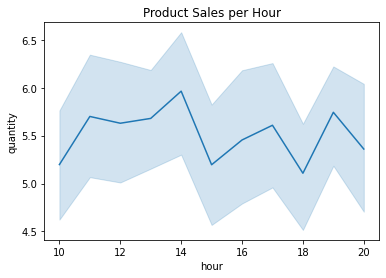

In [223]:
sns.lineplot(x="hour",  y = 'quantity',data =df).set_title("Product Sales per Hour")

#больше всег продаж в 14:00, меньше всего в 18:00

In [73]:
#посмотрим в каком месяце было больше всего продаж
df['month']=df.date.dt.month

In [76]:
df.groupby('month', as_index=False) \
    .agg({'branch':'count'}) \
    .sort_values("branch", ascending=False)

#в январе

,month,branch
0,1,352
2,3,345
1,2,303


c:\programdata\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='quantity'>

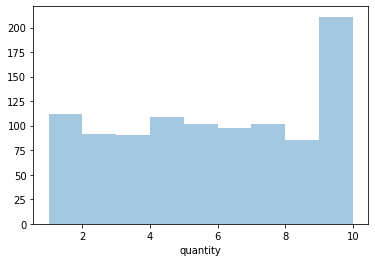

In [96]:
#посмотрим распределение рейтинга клиентов. Получается, с рейтингом 9 наибольшая частота встречаемости клиентов.

sns.distplot(df.quantity, kde=False)

In [94]:
#как правило, клиенты расплачиваются за покупки в магазине, используя Ewallet
df.groupby('payment', as_index=False) \
    .agg({'branch':'count'}) \
    .sort_values("branch", ascending=False)

,payment,branch
2,Ewallet,345
0,Cash,344
1,Credit card,311


In [140]:
#посмотрим на среднюю цену продажи в зависимости от дня
total_per_day=df.groupby('date',as_index=False) \
                .agg({'total':'mean'})

<AxesSubplot:xlabel='date', ylabel='total'>

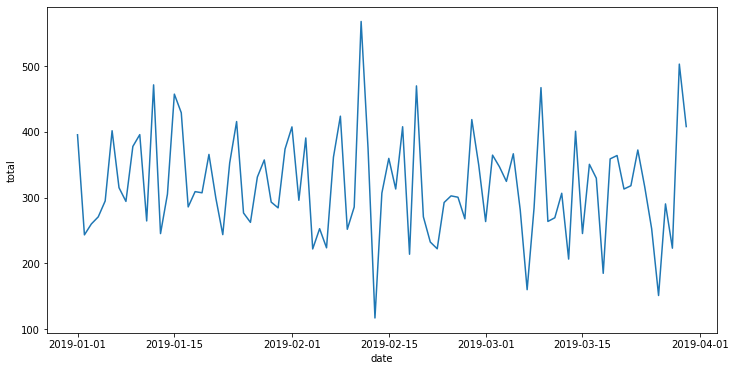

In [145]:
plt.figure(figsize=(12,6))
sns.lineplot(data=total_per_day, x="date", y="total")

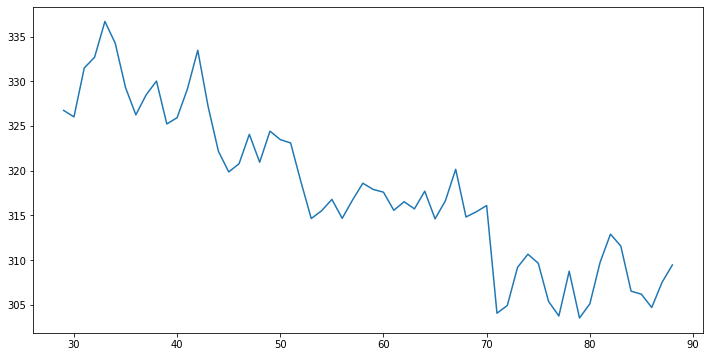

In [146]:
#используя скользящее среднее, можно заметить что средняя цена продажи уменьшается к концу третьего месяца
plt.figure(figsize=(12,6))
rolling_total_per_day=total_per_day.total.rolling(30).mean().plot()

In [ ]:
#попробуем развернуть таблицу, чтобы посмотреть продажи по дням в разрезе категорий товаров

In [213]:
quantity_product_line=df.groupby(['date','product_line'], as_index=False) \
                        .agg({'total':'sum'})
quantity_product_line

,date,product_line,total
0,2019-01-01,Electronic accessories,1382.7450
1,2019-01-01,Fashion accessories,621.2430
2,2019-01-01,Food and beverages,1066.0230
3,2019-01-01,Health and beauty,132.0270
4,2019-01-01,Home and lifestyle,399.7560
...,...,...,...
449,2019-03-30,Fashion accessories,85.5120
450,2019-03-30,Food and beverages,805.3080
451,2019-03-30,Health and beauty,1970.6400
452,2019-03-30,Home and lifestyle,216.8460


In [276]:
day_categories_pivot=quantity_product_line.pivot(index='date',columns='product_line',values='total')\
            .fillna(0).reset_index()
day_categories_pivot.head()

product_line,date,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
0,2019-01-01,1382.745,621.2430,1066.023,132.0270,399.7560,1143.3870
1,2019-01-02,138.663,593.3865,262.458,359.2050,0.0000,591.7905
2,2019-01-03,0.000,0.0000,0.000,1230.0120,750.0675,98.0490
3,2019-01-04,705.621,288.5820,0.000,110.0925,373.1700,146.2230
4,2019-01-05,690.018,523.2360,74.760,1128.8130,1119.8565,0.0000


In [277]:
day_categories_pivot.groupby('date')\
        .agg({'Fashion accessories':'min'})

,Fashion accessories
date,
2019-01-01,621.2430
2019-01-02,593.3865
2019-01-03,0.0000
2019-01-04,288.5820
2019-01-05,523.2360
...,...
2019-03-26,236.1765
2019-03-27,943.2990
2019-03-28,620.8965


In [278]:
df. head()

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,total,date,time,payment,cogs,gross_income,rating,month,hour,rate
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,2019-01-05,2021-02-18 13:08:00,Ewallet,522.83,26.1415,9.1,1,13,"(8.286, 9.143]"
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,2019-03-08,2021-02-18 10:29:00,Cash,76.40,3.8200,9.6,3,10,"(9.143, 10.0]"
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,340.5255,2019-03-03,2021-02-18 13:23:00,Credit card,324.31,16.2155,7.4,3,13,"(6.571, 7.429]"
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,489.0480,2019-01-27,2021-02-18 20:33:00,Ewallet,465.76,23.2880,8.4,1,20,"(8.286, 9.143]"
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,634.3785,2019-02-08,2021-02-18 10:37:00,Ewallet,604.17,30.2085,5.3,2,10,"(4.857, 5.714]"


In [305]:
px.bar(df, x="hour", y="quantity", color="product_line", title="quantity_vs_product_line")

#видно, что больше всего товаров покупают в 19 часов

In [311]:
#посмотрим, когда было продано наибольшее число товаров, выведем топ-5

df.groupby('date', as_index=False) \
    .agg({'quantity':'sum'}) \
    .sort_values("quantity", ascending=False) \
    .head(5)

#7 февраля и 14 марта наибольшее число товаров продано. построим график

,date,quantity
37,2019-02-07,128
72,2019-03-14,117
45,2019-02-15,106
63,2019-03-05,103
67,2019-03-09,99


In [312]:
px.bar(df, x="date", y="quantity", color="product_line", title="quantity_vs_product_line")